In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("NationalNames.csv")
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [3]:
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [4]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [5]:
df['Name'].nunique()

93889

In [8]:
unique_names_per_year = df.groupby('Year')['Name'].nunique().to_frame('UniqueNames')
unique_names_per_year.head()

,UniqueNames
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158


In [9]:
max_year = unique_names_per_year.loc[unique_names_per_year['UniqueNames'].idxmax()]
pd.DataFrame([max_year])

,UniqueNames
2008,32488


In [10]:
year_max = unique_names_per_year['UniqueNames'].idxmax()
df_year_max = df[df['Year'] == year_max]
top_name = df_year_max.loc[df_year_max['Count'].idxmax(), 'Name']
top_name

'Jacob'

In [12]:
jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
jacob_female.loc[[jacob_female['Count'].idxmax()]]

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [15]:
neutral_by_year = (
    df.groupby(['Year', 'Name'])['Gender']
      .nunique()
      .reset_index()
)

neutral_by_year = neutral_by_year[neutral_by_year['Gender'] == 2]
neutral_count = neutral_by_year.groupby('Year')['Name'].nunique().to_frame('NeutralNames')
neutral_count.loc[[neutral_count['NeutralNames'].idxmax()]]

,NeutralNames
Year,
2008,2557


In [16]:
births_per_year = df.groupby('Year')['Count'].sum().to_frame('TotalBirths')
births_per_year.head()

,TotalBirths
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


In [18]:
births_per_year = df.groupby('Year')['Count'].sum().to_frame('TotalBirths')
births_per_year.loc[[births_per_year['TotalBirths'].idxmax()]]

,TotalBirths
Year,
1957,4200026


In [22]:
gender_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
gender_per_year.head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


In [24]:
int((gender_per_year['F'] > gender_per_year['M']).sum())

54

In [26]:
int(df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum())

4139

In [28]:
years = df['Year'].nunique()
print(f"Спостереження проводилося {years} років")

Спостереження проводилося 135 років


In [42]:
neutral = df.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
neutral = neutral[neutral['Gender'] == 2]
neutral_names = neutral.groupby('Name')['Year'].nunique()
neutral_names = neutral_names[neutral_names == df['Year'].nunique()]
neutral_names.reset_index()['Name'].head(15)

0     Francis
1       James
2        Jean
3       Jesse
4      Jessie
5        John
6     Johnnie
7      Joseph
8         Lee
9      Leslie
10     Marion
11      Ollie
12     Robert
13     Sidney
14     Tommie
Name: Name, dtype: object

In [38]:
name_counts = df.groupby('Name')['Count'].sum()
least_popular = name_counts[name_counts == name_counts.min()]
most_popular_among_least = least_popular.idxmax()
count_value = least_popular.max()

print(f"Найпопулярніше серед непопулярних імен — це {most_popular_among_least}. Його використовували {count_value} разів.")

Найпопулярніше серед непопулярних імен — це Aabid. Його використовували 5 разів.


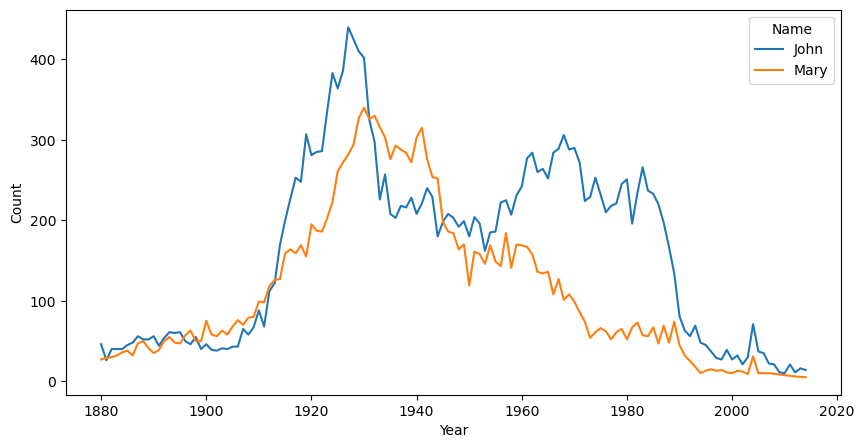

In [37]:
john_f = df[(df['Name'] == 'John') & (df['Gender'] == 'F')].groupby('Year')['Count'].sum().reset_index()
mary_m = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')].groupby('Year')['Count'].sum().reset_index()

john_f['Count'] = john_f['Count'] / 1
mary_m['Count'] = mary_m['Count'] / 1

plt.figure(figsize=(10,5))
plt.plot(john_f['Year'], john_f['Count'], label='John')
plt.plot(mary_m['Year'], mary_m['Count'], label='Mary')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Name')
plt.show()
